In [3]:
import pandas as pd 
import numpy as np 
#시각화
import matplotlib.pyplot as plt
import seaborn as sns
#경고무시
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

# plt.rcParams['font.family'] = 'AppleGothic' # 맥(Mac) 사용자
plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드


In [4]:
df_ori = pd.read_csv('./팀_basline_csv.csv', encoding='utf-8')

In [5]:
df=df_ori.copy()
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,금요일,주중,1,406
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,금요일,주중,1,13
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,금요일,주중,1,13
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,금요일,주중,1,13
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,금요일,주중,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...
1461,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y,공휴일,휴일,3,691
1462,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y,공휴일,휴일,3,18
1463,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1
1464,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 12 columns):
brandnm       1466 non-null object
goodsnm       1466 non-null object
USER          1466 non-null object
reg_date      1466 non-null object
order_date    1466 non-null object
p_type        1466 non-null object
sub_type      1466 non-null object
app_yn        1466 non-null object
days          1466 non-null object
day_type      1466 non-null object
month         1466 non-null int64
How_long      1466 non-null int64
dtypes: int64(2), object(10)
memory usage: 137.6+ KB


>**(1).brandnm: 아이템의 브랜드 이름 컬럼 : 범주형 <br>
(2).goodsnm : 아이템의 특성을 담은 이름 컬럼 : 범주형 <br>
(3). USER : 사용자 ID 컬럼 : 범주형 <br>
(4). reg_date : 사용자 가입일 컬럼 : 날짜형 <br>
(5). order_date : 아이템 주문일 컬럼 : 날짜형<br>
(6). p_type : 주문 상품권 종류 5일 7일 : 범주형<br>
(7). sub_type : 주문 아이템 카테고리 : 범주형 <br>
(8). add_yn : 사용자의 어플리케이션 사용 여부 : 범주형**

# Retention, Revenue


## 사용자의 재방문률을 높이고 구매를 촉진하는 방법은 무엇이 있을까? 


In [7]:
usr = list(df.USER.unique())
# usr  # 고객명단
print('고객 수 : ', len(usr))

고객 수 :  1229


### 1. (한번에 주문한 개수에 따른) 일반/우량 고객 분류

In [8]:
temp = df.USER.value_counts()
for i in range(1, 12):
    if len(temp[temp.values > i]) != 0:
        print('한번에 {}개 이상 구매(렌트)한 고객 수 : '.format(i+1), len(temp[temp.values > i]))
    else:
        break

한번에 2개 이상 구매(렌트)한 고객 수 :  139
한번에 3개 이상 구매(렌트)한 고객 수 :  50
한번에 4개 이상 구매(렌트)한 고객 수 :  17
한번에 5개 이상 구매(렌트)한 고객 수 :  9
한번에 6개 이상 구매(렌트)한 고객 수 :  8
한번에 7개 이상 구매(렌트)한 고객 수 :  5
한번에 8개 이상 구매(렌트)한 고객 수 :  3
한번에 9개 이상 구매(렌트)한 고객 수 :  3
한번에 10개 이상 구매(렌트)한 고객 수 :  2
한번에 11개 이상 구매(렌트)한 고객 수 :  1


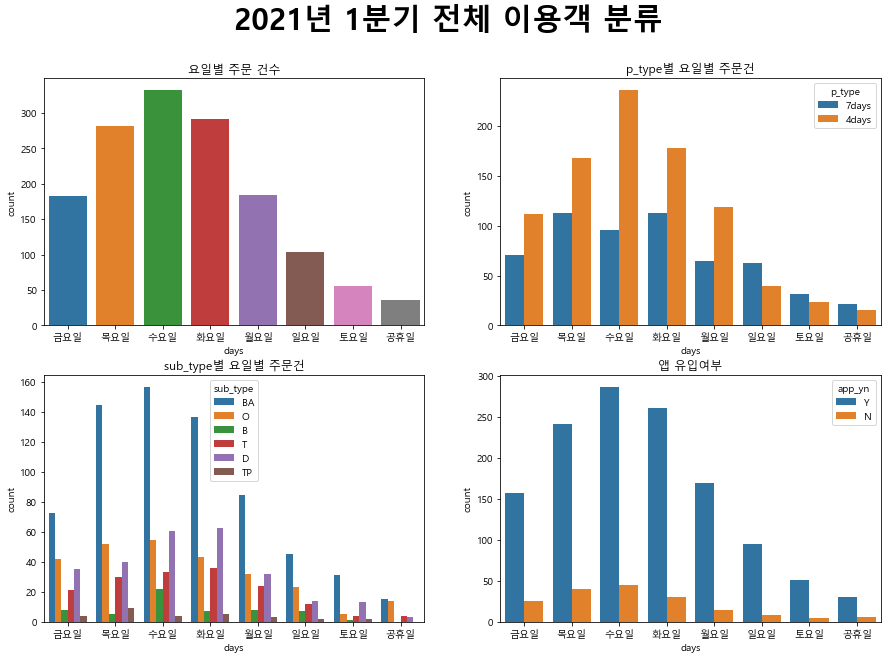

In [9]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=df, x='days')
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=df, x='days', hue='p_type')
plt.title('p_type별 요일별 주문건')

plt.subplot(223)
sns.countplot(data=df, x='days', hue='sub_type')
plt.title('sub_type별 요일별 주문건')

plt.subplot(224)
sns.countplot(data=df, x='days', hue='app_yn')
plt.title('앱 유입여부')

plt.suptitle('2021년 1분기 전체 이용객 분류',fontsize=30, fontweight = 'bold')
plt.show()

한번에 10가지 이상의 아이템을 렌트한 고객의 데이터만 따로 살펴보자

In [10]:
# 10회 이상 구매한 고객 1 
df.query('USER=="a1149461"')

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
1144,Alice & Olivia,see-through lace detail blouse black,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1145,Sandro,embroidery detail lace skirt multi,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1146,Time,draping detail midi skirt gray,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1147,El estilo de Claire,ruffle detail see-through sleeve blouse black,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1148,It michaa,pocket basic pattern skirt green,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1149,roajeu,ruffle basic pattern mermaid trumpet-skirt green,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1150,Alexander Wang,basic pattern skirt grey,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1151,Christian Dior,basic pattern sweater burgundy,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1152,MSGM,basic pattern top black,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1153,Fayewoo,ruffle lace pattern mermaid trumpet-skirt red,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2


In [11]:
# 10회 이상 구매한 고객 2 
df.query('USER=="a1149583"')
# 마찬가지로 하루에 여러 상품 렌트
# 앱 사용 x

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
1098,Theory,one button jacket gray,a1149583,2021-03-16,2021-03-19,4days,O,N,금요일,주중,3,3
1099,Michaa,stitch detail midi skirt white,a1149583,2021-03-16,2021-03-19,4days,B,N,금요일,주중,3,3
1100,Prada,daino shoulder bag skin,a1149583,2021-03-16,2021-03-19,4days,BA,N,금요일,주중,3,3
1101,Ted Baker,pleats basic pattern blouse pink,a1149583,2021-03-16,2021-03-19,4days,T,N,금요일,주중,3,3
1102,La maille sezane,frill dots pattern blouse nude,a1149583,2021-03-16,2021-03-19,4days,T,N,금요일,주중,3,3
1103,Michaa,basic pattern A-Line knit-dress nude,a1149583,2021-03-16,2021-03-19,4days,D,N,금요일,주중,3,3
1104,Jigott,button basic pattern blouse white,a1149583,2021-03-16,2021-03-19,4days,T,N,금요일,주중,3,3
1105,It michaa,basic pattern H-Line dress white,a1149583,2021-03-16,2021-03-19,4days,D,N,금요일,주중,3,3
1106,Mine,basic pattern skirt pink,a1149583,2021-03-16,2021-03-19,4days,B,N,금요일,주중,3,3
1107,Mine,punching basic pattern skirt skyblue,a1149583,2021-03-16,2021-03-19,4days,B,N,금요일,주중,3,3


한번에 10개 이상을 구매한 고객 데이터를 살펴보면, 
- 브랜드가 대부분 다르고, 
- sub_type 중복되는 것이 많으며,
- 렌트기간이 짧다. 

이러한 성향을 보았을 때 평범한 개인(1인) 사용을 위해 렌트한 것으로 보기 어렵다. 
하루에 여러번 옷을 갈아입을 필요가 있는, 특정한 목적이 있거나, 여러명이 하나의 유저로 함께 렌트한 것으로 예상된다. 

일반적으로 1~2개의 아이템을 한번에 결제한다고 생각하고, 한번에 3개 이상을 결제/주문하는 고객을 따로 분류하여 분석을 진행한다. 
여기서 우리는 한번에 3가지 이상 아이템을 구매하는 고객을 우량고객으로 정의하기로 한다.

한번에 3개 이상 구매(렌트)한 고객은 50명이다.

In [12]:
temp = df.USER.value_counts()

# 동일한 USER의 행이 3개 이상인 경우 
over3 = list(temp[temp.values > 2].index)

# 3개 이상 이용한 고객들만 뽑은 데이터 프레임
over3_df = df[df.USER==over3[0]]
for i in range(1,len(over3)):
    over3_df = pd.concat([over3_df, df[df.USER==over3[i]]])
over3_df

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
1144,Alice & Olivia,see-through lace detail blouse black,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1145,Sandro,embroidery detail lace skirt multi,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1146,Time,draping detail midi skirt gray,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1147,El estilo de Claire,ruffle detail see-through sleeve blouse black,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1148,It michaa,pocket basic pattern skirt green,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
295,Cos,wave hem line dress white,a1143670,2021-01-18,2021-01-21,7days,D,Y,목요일,주중,1,3
296,Michaa,slit basic pattern H-Line shirt-dress white,a1143670,2021-01-18,2021-01-21,7days,D,Y,목요일,주중,1,3
693,Rebecca Minkoff,bell line slip dress black,a1145581,2021-02-05,2021-02-08,4days,D,Y,월요일,주중,2,3
694,Vince,pocket basic pattern fur-outer brown,a1145581,2021-02-05,2021-02-08,4days,O,Y,월요일,주중,2,3


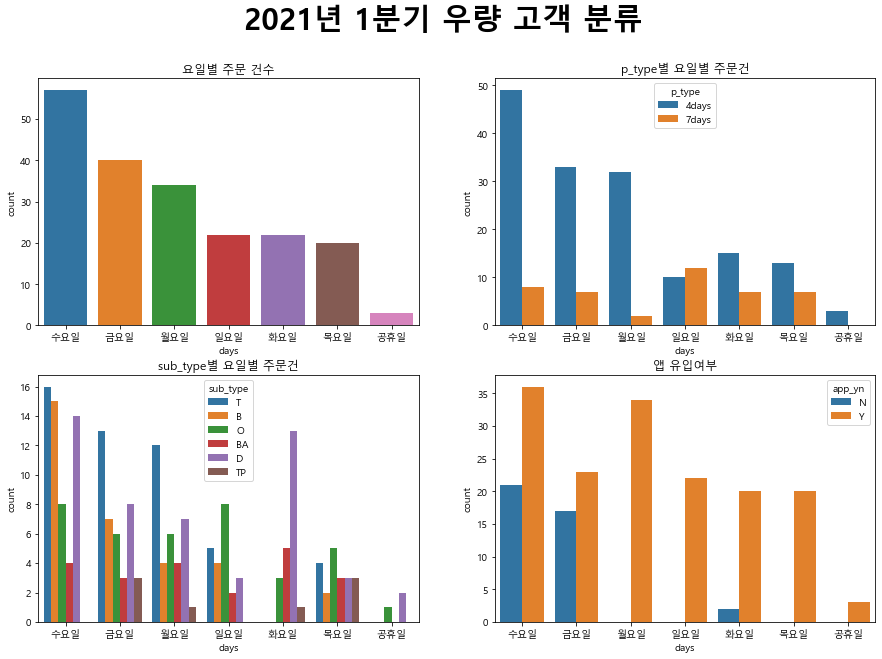

In [13]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=over3_df, x='days')
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=over3_df, x='days', hue='p_type')
plt.title('p_type별 요일별 주문건')

plt.subplot(223)
sns.countplot(data=over3_df, x='days', hue='sub_type')
plt.title('sub_type별 요일별 주문건')

plt.subplot(224)
sns.countplot(data=over3_df, x='days', hue='app_yn')
plt.title('앱 유입여부')

plt.suptitle('2021년 1분기 우량 고객 분류',fontsize=30, fontweight = 'bold')
plt.show()

In [15]:
a = df['USER'].value_counts()
# 3개 이상 이용한 고객의 선호 브랜드

more3 = list(a[a.values > 2].index)
more3

more3_df = df[df['USER']==more3[0]]

for i in range(1,len(more3)):
    more3_df = pd.concat([more3_df, df[df['USER']==more3[i]]])
more3_df

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
1144,Alice & Olivia,see-through lace detail blouse black,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1145,Sandro,embroidery detail lace skirt multi,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1146,Time,draping detail midi skirt gray,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1147,El estilo de Claire,ruffle detail see-through sleeve blouse black,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1148,It michaa,pocket basic pattern skirt green,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
295,Cos,wave hem line dress white,a1143670,2021-01-18,2021-01-21,7days,D,Y,목요일,주중,1,3
296,Michaa,slit basic pattern H-Line shirt-dress white,a1143670,2021-01-18,2021-01-21,7days,D,Y,목요일,주중,1,3
693,Rebecca Minkoff,bell line slip dress black,a1145581,2021-02-05,2021-02-08,4days,D,Y,월요일,주중,2,3
694,Vince,pocket basic pattern fur-outer brown,a1145581,2021-02-05,2021-02-08,4days,O,Y,월요일,주중,2,3


In [16]:
len(more3_df['USER'].unique())

50

In [17]:
# 3개 이상 이용한 고객의 선호 브랜드
more3_df.brandnm.value_counts(ascending=False).head(10)

Mixed                  8
Max Mara               6
Burberry               6
El estilo de Claire    6
Burberry London        5
Saint Laurent          5
Christian Dior         5
Thom Browne            4
Balmain                4
Sandro                 4
Name: brandnm, dtype: int64

**'Mixed'는 상.하의가 서로 다른 브랜드의 조합으로 당초 데이터에서는 결측값으로 처리되었으나, 임의로 부여한 값이다.

In [92]:
df[df.brandnm == 'Mixed']

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
146,Mixed,feminine military blouse & high waist wide slacks,a1144948,2021-01-30,2021-01-30,4days,TP,Y,토요일,휴일,1,0
147,Mixed,button basic pattern doublebreasted-jacket sky...,a170041,2020-01-01,2021-01-30,4days,TP,Y,토요일,휴일,1,395
160,Mixed,lace point shirring blouse pink & lace detail ...,a1141009,2021-01-04,2021-01-28,4days,TP,Y,목요일,주중,1,24
220,Mixed,printing pattern hoodie grey & pocket basic pa...,a1144470,2021-01-25,2021-01-26,4days,TP,Y,화요일,주중,1,1
266,Mixed,button basic pattern jacket black & pocket bas...,a121913,2019-05-05,2021-01-21,4days,TP,Y,목요일,주중,1,627
281,Mixed,buckle shirt & embroidery lace skirt charcoal,a1132297,2020-11-22,2021-01-21,7days,TP,Y,목요일,주중,1,60
284,Mixed,button tweed pattern doublebreasted-coat multi...,a1127979,2020-10-31,2021-01-21,7days,TP,Y,목요일,주중,1,82
328,Mixed,long sleeve rib t-shirt & check pattern square...,a1134915,2020-12-03,2021-01-19,7days,TP,N,화요일,주중,1,47
341,Mixed,cutout neck knit & color pleats belt skirt,a1141257,2021-01-05,2021-01-19,4days,TP,Y,화요일,주중,1,14
366,Mixed,El estilo de Claire - neoprene botanical print...,a1107090,2020-07-03,2021-01-17,4days,TP,Y,일요일,휴일,1,198


그렇다면, 1~2개를 구입하는 일반적인 패턴을 보이는 한번에 3개 이상의 아이템을 구매하는 우량 고객간의 선호 브랜드는 어떻게 다를까? 

In [18]:
temp = df.USER.value_counts()

# 한번에 1~2개만 빌린 고객들
under3 = list(temp[temp.values <= 2].index)

# 일반 고객들만 뽑은 데이터 프레임
under3_df = df[df.USER==under3[0]]
for i in range(1,len(under3)):
    under3_df = pd.concat([under3_df, df[df.USER==under3[i]]])
under3_df.head()

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
480,Sandro,button basic pattern H-Line dress,a17062,2018-08-19,2021-02-23,4days,D,Y,화요일,주중,2,919
481,Time,pocket basic pattern coat black,a17062,2018-08-19,2021-02-23,4days,O,Y,화요일,주중,2,919
1407,Burberry,check pattern kilt-skirt brown,a1144910,2021-01-29,2021-03-03,4days,B,N,수요일,주중,3,33
1408,Burberry,belt check pattern trench-coat beige,a1144910,2021-01-29,2021-03-03,4days,O,N,수요일,주중,3,33
585,It michaa,flower pattern sheer long dress,a1146672,2021-02-17,2021-02-17,4days,D,Y,수요일,주중,2,0


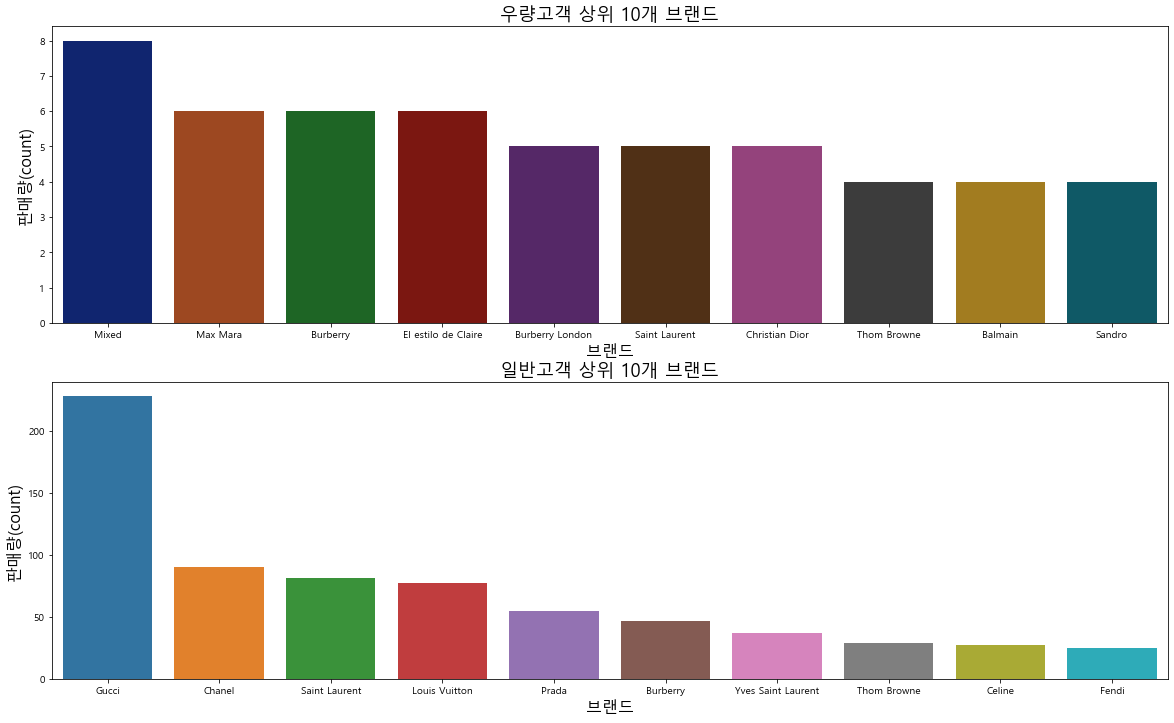

In [19]:
over3_df_br = over3_df.brandnm.value_counts().sort_values(ascending=False).head(10) # 우량고객
under3_df_br = under3_df.brandnm.value_counts().sort_values(ascending=False).head(10) # 일반고객

plt.subplots(2,1,figsize=(20,12))
plt.subplot(211)
sns.barplot(over3_df_br.index, over3_df_br.values, palette='dark')
plt.title('우량고객 상위 10개 브랜드', fontsize=18)
plt.ylabel('판매량(count)', fontsize=16)
plt.xlabel('브랜드', fontsize=16)

plt.subplot(212)
sns.barplot(under3_df_br.index, under3_df_br.values)
plt.title('일반고객 상위 10개 브랜드', fontsize=18)
plt.ylabel('판매량(count)', fontsize=16)
plt.xlabel('브랜드', fontsize=16)
plt.show()

>**일반고객 상위 1 구찌는 우량고객기준 브랜드 상위10 안에 나타나지 않음  
상하의 혼합하여 사용하는 경우(Mixed)가 선호1로 나타남**  
  
>**일반고객과 우량고객 상위10 중복된 브랜드는**
- Saint Laurent, Burberry, Thom Browne

In [32]:
# 우량고객 월별
more3_df_m1 = more3_df.loc[more3_df['month'] == 1]
more3_df_m2 = more3_df.loc[more3_df['month'] == 2]
more3_df_m3 = more3_df.loc[more3_df['month'] == 3]

print('우량고객의 1월 구매건수 :', len(more3_df_m1))
print('우량고객의 2월 구매건수 :',len(more3_df_m2))
print('우량고객의 3월 구매건수 :',len(more3_df_m3))

우량고객의 1월 구매건수 : 63
우량고객의 2월 구매건수 : 57
우량고객의 3월 구매건수 : 78


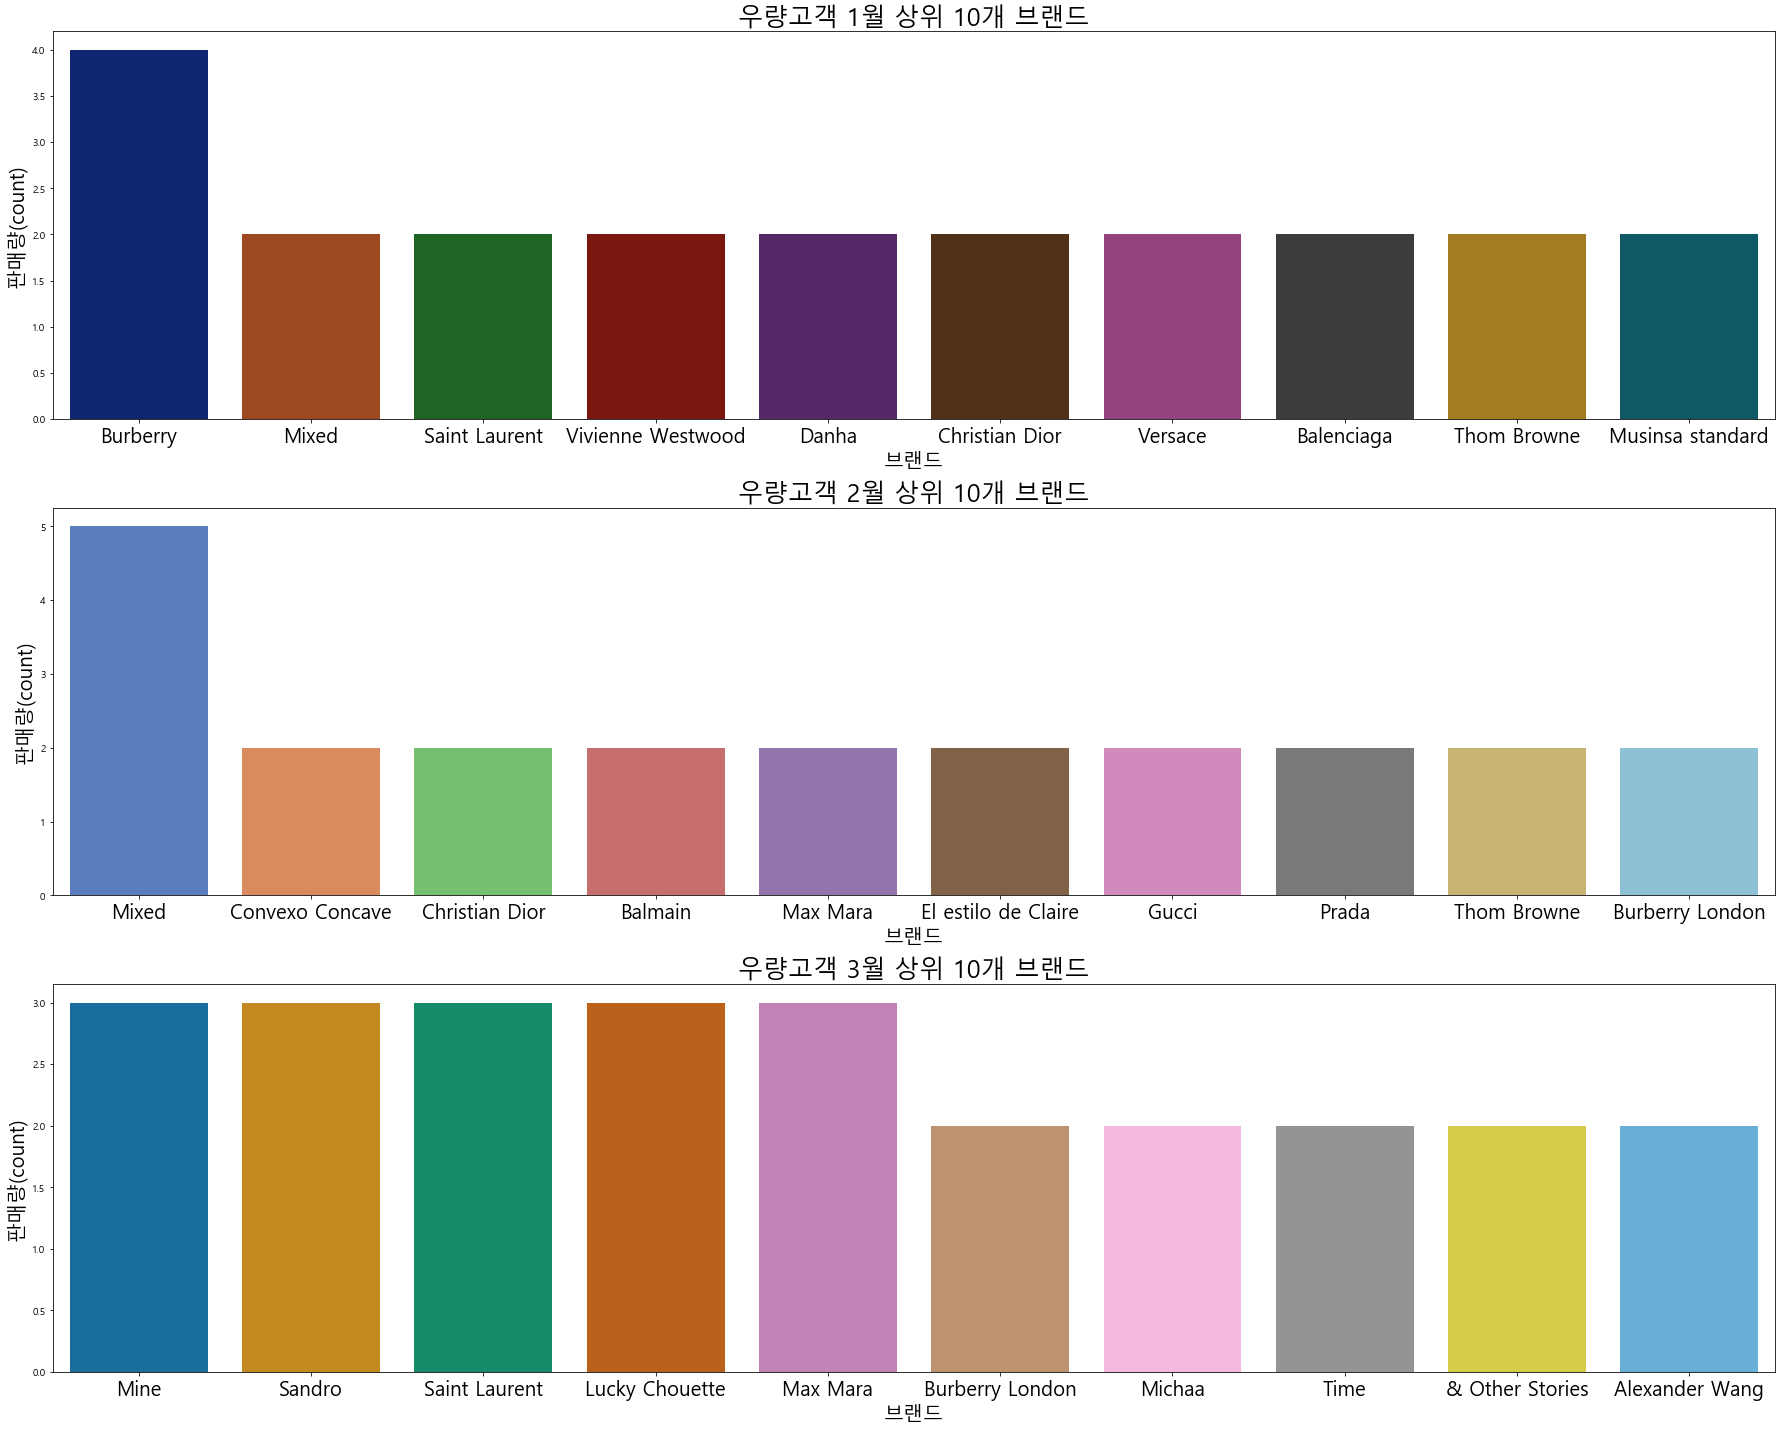

In [46]:
more3_df_m1_br = more3_df_m1['brandnm'].value_counts().sort_values(ascending=False).head(10) # 우량 1월 브랜드
more3_df_m2_br = more3_df_m2['brandnm'].value_counts().sort_values(ascending=False).head(10) # 우량 2월 브랜드
more3_df_m3_br = more3_df_m3['brandnm'].value_counts().sort_values(ascending=False).head(10) # 우량 3월 브랜드

plt.subplots(3,1,figsize=(25,20))
plt.subplot(311)
sns.barplot(more3_df_m1_br.index, more3_df_m1_br.values, palette='dark')
plt.xticks(fontsize=20)
plt.title('우량고객 1월 상위 10개 브랜드', fontsize=25)
plt.ylabel('판매량(count)', fontsize=20)
plt.xlabel('브랜드', fontsize=20)

plt.subplot(312)
sns.barplot(more3_df_m2_br.index, more3_df_m2_br.values, palette='muted')
plt.xticks(fontsize=20)
plt.title('우량고객 2월 상위 10개 브랜드', fontsize=25)
plt.ylabel('판매량(count)', fontsize=20)
plt.xlabel('브랜드', fontsize=20)

plt.subplot(313)
sns.barplot(more3_df_m3_br.index, more3_df_m3_br.values, palette='colorblind')
plt.xticks(fontsize=20)
plt.title('우량고객 3월 상위 10개 브랜드', fontsize=25)
plt.ylabel('판매량(count)', fontsize=20)
plt.xlabel('브랜드', fontsize=20)
plt.tight_layout()
plt.show()

>1월 상위 top3  
- Burberry, Mixed, Saint Laurant  
  
>2월 상위 top3  
- Mixed, Convexo Concave, Christian Dior  
  
>3월 상위 top3  
- Mine, Sandro, Saint Laurent  

우량고객 전체에서 선호 top1이었던 Mixed는 3월에서는 top10안에 전혀 들지 않음  
월별로 선호하는 브랜드가 있는걸까? (브랜드마다 계절 의류 보유수에 따라 다를까?)

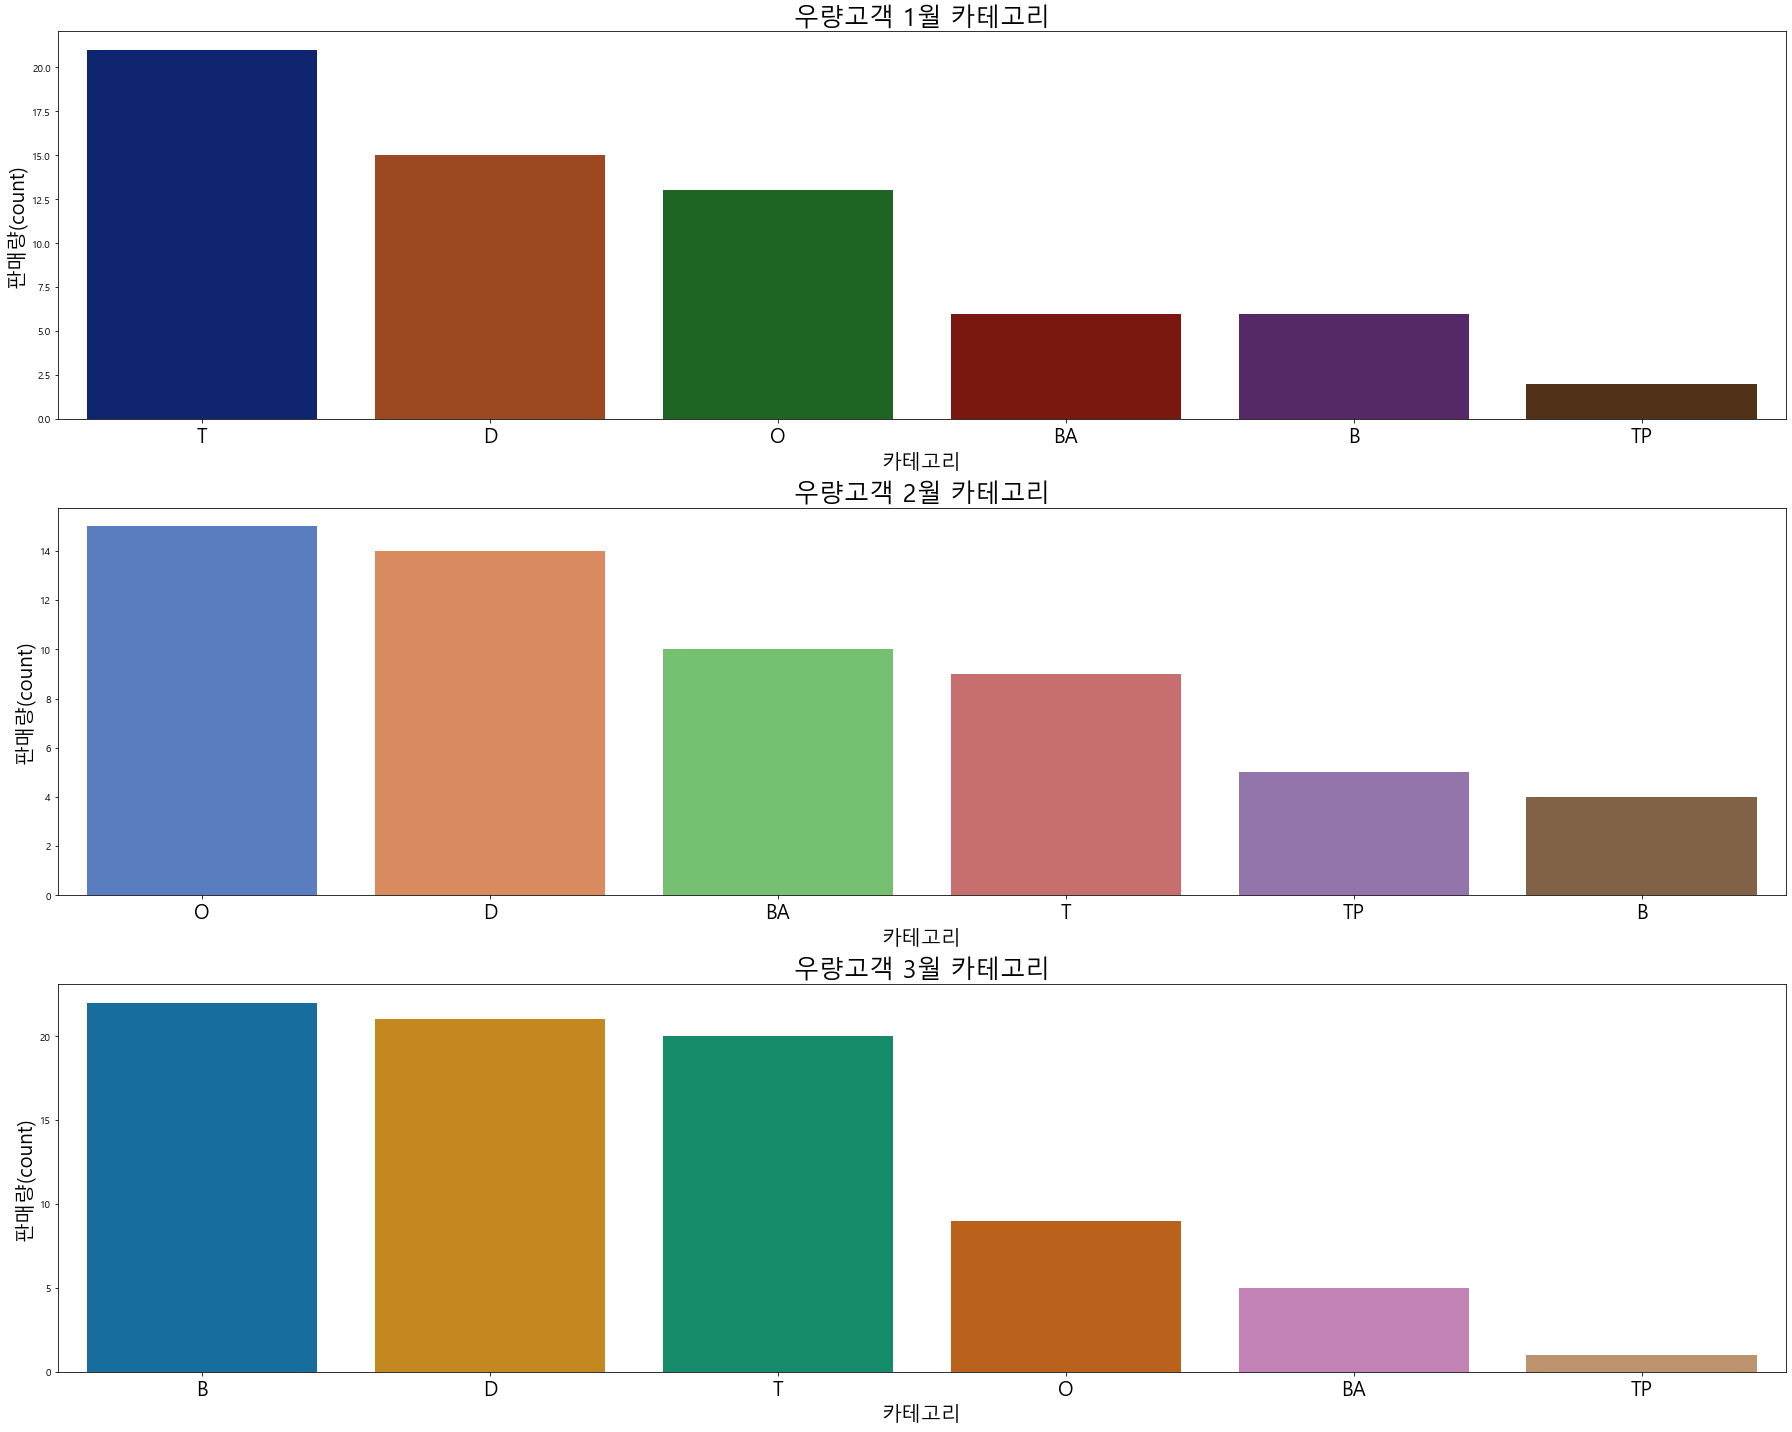

In [47]:
more3_df_m1_sub = more3_df_m1['sub_type'].value_counts().sort_values(ascending=False) # 우량 1월 카테고리
more3_df_m2_sub = more3_df_m2['sub_type'].value_counts().sort_values(ascending=False) # 우량 2월 카테고리
more3_df_m3_sub = more3_df_m3['sub_type'].value_counts().sort_values(ascending=False) # 우량 3월 카테고리

plt.subplots(3,1,figsize=(25,20))
plt.subplot(311)
sns.barplot(more3_df_m1_sub.index, more3_df_m1_sub.values, palette='dark')
plt.xticks(fontsize=20)
plt.title('우량고객 1월 카테고리', fontsize=25)
plt.ylabel('판매량(count)', fontsize=20)
plt.xlabel('카테고리', fontsize=20)

plt.subplot(312)
sns.barplot(more3_df_m2_sub.index, more3_df_m2_sub.values, palette='muted')
plt.xticks(fontsize=20)
plt.title('우량고객 2월 카테고리', fontsize=25)
plt.ylabel('판매량(count)', fontsize=20)
plt.xlabel('카테고리', fontsize=20)

plt.subplot(313)
sns.barplot(more3_df_m3_sub.index, more3_df_m3_sub.values, palette='colorblind')
plt.xticks(fontsize=20)
plt.title('우량고객 3월 카테고리', fontsize=25)
plt.ylabel('판매량(count)', fontsize=20)
plt.xlabel('카테고리', fontsize=20)
plt.tight_layout()
plt.show()

>1월과 2월에는 아우터의 구매건이 많은 편이었으며, 3월에는 아우터의 수요가 줄었음  
계절에 따른 카테고리별 구매건이 달라짐을 알 수 있음  
드레스의 수요는 계절과 상관없이 높음

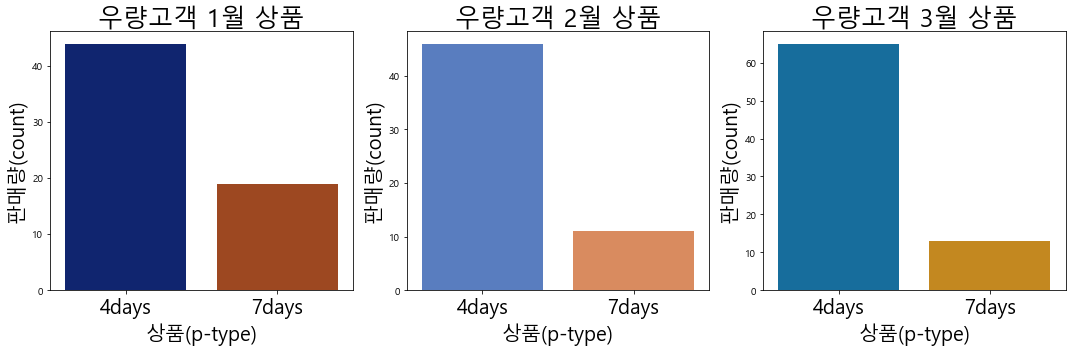

In [49]:
more3_df_m1_p = more3_df_m1['p_type'].value_counts().sort_values(ascending=False) # 우량 1월 상품
more3_df_m2_p = more3_df_m2['p_type'].value_counts().sort_values(ascending=False) # 우량 2월 상품
more3_df_m3_p = more3_df_m3['p_type'].value_counts().sort_values(ascending=False) # 우량 3월 상품

plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.barplot(more3_df_m1_p.index, more3_df_m1_p.values, palette='dark')
plt.xticks(fontsize=20)
plt.title('우량고객 1월 상품', fontsize=25)
plt.ylabel('판매량(count)', fontsize=20)
plt.xlabel('상품(p-type)', fontsize=20)

plt.subplot(132)
sns.barplot(more3_df_m2_p.index, more3_df_m2_p.values, palette='muted')
plt.xticks(fontsize=20)
plt.title('우량고객 2월 상품', fontsize=25)
plt.ylabel('판매량(count)', fontsize=20)
plt.xlabel('상품(p-type)', fontsize=20)

plt.subplot(133)
sns.barplot(more3_df_m3_p.index, more3_df_m3_p.values, palette='colorblind')
plt.xticks(fontsize=20)
plt.title('우량고객 3월 상품', fontsize=25)
plt.ylabel('판매량(count)', fontsize=20)
plt.xlabel('상품(p-type)', fontsize=20)
plt.tight_layout()
plt.show()

>**상품 사용은 4일권이 가장 많고, 1월부터 3월까지 늘어난 우량고객의 구매건수만큼 4일권의 구매도 늘었지만,  
7일권 구매는 큰 변화가 없음**

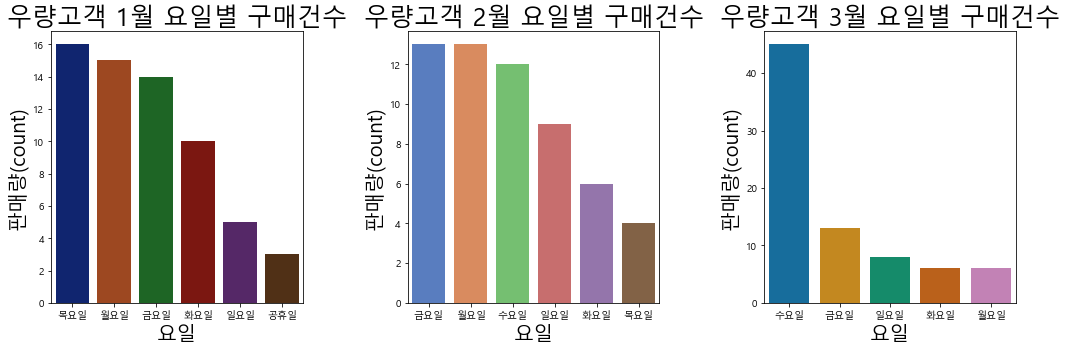

In [51]:
more3_df_m1_day = more3_df_m1['days'].value_counts().sort_values(ascending=False) # 우량 1월 요일
more3_df_m2_day = more3_df_m2['days'].value_counts().sort_values(ascending=False) # 우량 2월 요일
more3_df_m3_day = more3_df_m3['days'].value_counts().sort_values(ascending=False) # 우량 3월 요일

plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.barplot(more3_df_m1_day.index, more3_df_m1_day.values, palette='dark')
plt.xticks(fontsize=10)
plt.title('우량고객 1월 요일별 구매건수', fontsize=25)
plt.ylabel('판매량(count)', fontsize=20)
plt.xlabel('요일', fontsize=20)

plt.subplot(132)
sns.barplot(more3_df_m2_day.index, more3_df_m2_day.values, palette='muted')
plt.xticks(fontsize=10)
plt.title('우량고객 2월 요일별 구매건수', fontsize=25)
plt.ylabel('판매량(count)', fontsize=20)
plt.xlabel('요일', fontsize=20)

plt.subplot(133)
sns.barplot(more3_df_m3_day.index, more3_df_m3_day.values, palette='colorblind')
plt.xticks(fontsize=10)
plt.title('우량고객 3월 요일별 구매건수', fontsize=25)
plt.ylabel('판매량(count)', fontsize=20)
plt.xlabel('요일', fontsize=20)
plt.tight_layout()
plt.show()

>**1월부터 3월까지 요일별 결제건수가 다름   
1월에는 목,월,금  
2월에는 금,월,수  
3월에는 수요일에 결제건수가 압도적으로 많음**  
  
>**결제 후, 배송까지 하루가 걸린다고 가정하면 1월과 2월은  
상품 중 4일권을 예로 들면, 금요일-월요일/ 화요일-금요일 -> 주말사용, 평일사용 골고루 분포되어 있음  
3월은 목요일-일요일 즉 주말사용이 늘었음**

In [53]:
print(len(more3_df['reg_date'].unique()))
more3_df['reg_date'].unique()

43


array(['2021-03-15', '2021-03-16', '2021-01-13', '2020-03-20',
       '2021-01-18', '2020-11-09', '2020-03-11', '2021-01-01',
       '2020-12-21', '2021-02-18', '2021-01-26', '2019-11-23',
       '2021-03-13', '2020-12-23', '2021-02-14', '2020-11-12',
       '2020-02-19', '2021-02-03', '2021-01-04', '2021-01-02',
       '2021-02-06', '2020-09-14', '2021-02-01', '2021-03-24',
       '2021-03-01', '2019-03-09', '2020-12-04', '2021-02-25',
       '2021-02-02', '2020-03-09', '2020-11-18', '2020-04-17',
       '2020-12-22', '2021-01-20', '2021-03-23', '2021-03-22',
       '2021-01-07', '2020-11-23', '2021-02-17', '2021-03-30',
       '2021-02-08', '2021-01-25', '2021-02-05'], dtype=object)

2016년 9월 클로젯셰어 오픈  
우량고객의 가입일 2021년이 가장 많다.